<a href="https://colab.research.google.com/github/shangeth/Google-ML-Academy/blob/master/1-Intro-to-Deep-Learning/1_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<h1 align="center"><a href='https://shangeth.com/courses/'>Deep Learning - Beginners Track</a></h1>
<h3 align="center">Instructor: <a href='https://shangeth.com/'>Shangeth Rajaa</a></h3>
<hr>

# Logistic Regression

Logistic Regression is one of the most commonly used classification model. Unlike Linear Regression which predicts a real unbounded value $\hat{y} = f(X) = WX+b$, Logistic Regression predicts the probability of a data belonging to a particular class. 

<br>

For example for a given data (X,y) where X is a recieved email and y is 0 if email is spam and 1 if email is not spam. Logistic regression predicts the probability of the email X to be not spam.
$\hat{y} = f(X) = P(y=1|X)$

<br>

So if $\hat{y} = P(y=1|X) > 0.5$ then the probability of the email to be spam ih high, so $X$ is a spam email.


Other examples of classification can be 

- Classification of image as cat, dog, parrot $ y = {0, 1, 2}$. Here y can be 0 or 1 or 2 depending on the probability of model prediction. (Multi class Classification)
-  Classification of Cancer report as Malignant/Benign $y = {0, 1}$. (Binary Classification)

## Why not use Linear Regression Model for classification?


$\hat{y}_{linreg} = WX+b$ where $\hat{y} \in \mathbf{R} $, so the prediction can take value from $-\infty$ to $\infty$.

$\hat{y}_{classification} \in \{ 0, 1, 2, ..., n \}$, Classification prediction takes discrete values depening on number of class.

So we need a model which limits the prediction in the range $\{0,1\}$ for binary classification and $\{0,1, 2, ..., n\}$ for multi-class classification.


## Classification Data

Let's use ```sklearn.datasets.make_blobs``` to make a random classification dataset in 2D space so we can visualize it.

We are generating less data for visualization, for training we will use more data.

In [7]:
from sklearn.datasets import make_blobs

# 10 examples, (X)2 feature, (y)2 classes
X, y = make_blobs(n_samples=10, n_features=2, centers=2, random_state=0)

X.shape, y.shape

((10, 2), (10,))

Let's seperate the 0 and 1 class to visualize it.

In [8]:
import numpy as np

class_0 = np.where(y == 0)
class_1 = np.where(y == 1)

X_0 = X[class_0]
X_1 = X[class_1]

X_0.shape, X_1.shape

((5, 2), (5, 2))

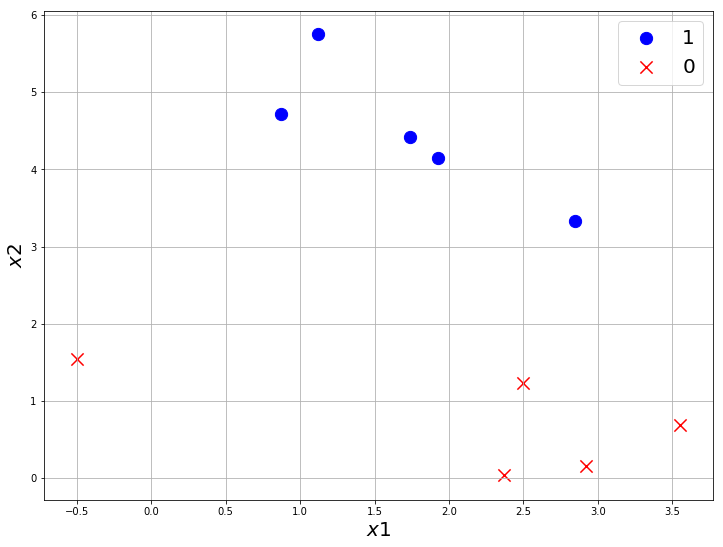

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
plt.scatter(X_0[:, 0], X_0[:, 1], marker='o', s=150, color='blue', label='1')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=150, color='red', label='0')
plt.xlabel('$x1$', fontsize=20)
plt.ylabel('$x2$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

One possible linear classifier for this dataset can be

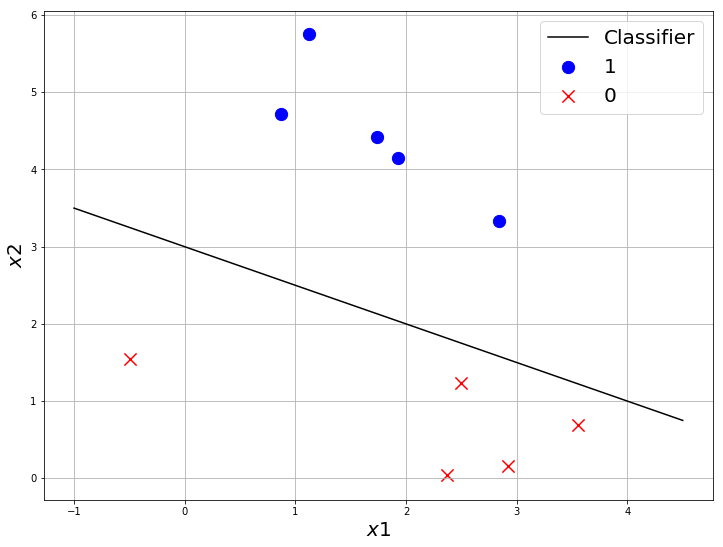

In [33]:
import matplotlib.pyplot as plt

x = np.arange(-1, 5, 0.5)
y = 3 - 0.5 * x


plt.figure(figsize=(12,9))
plt.scatter(X_0[:, 0], X_0[:, 1], marker='o', s=150, color='blue', label='1')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=150, color='red', label='0')
plt.plot(x, y, label='Classifier', color='black')
plt.xlabel('$x1$', fontsize=20)
plt.ylabel('$x2$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

Let us consider the line $y = 3-x/2$ is the best classifier which seperates the data.

Let $C(x,y) = y + x/2-3 $.

By basic school geometry, we know points in opposite side of a line $C(x,y)$ will give opposite values on $C(x,y)$.

ie: $C(x_1,y_1).C(x_2,y_2) < 0$, then $(x_1, y_1)$ and $(x_2, y_2)$ lies in the opposite side of $C(x,y)$.


Why are we even talking about this property? 
Well, this can tell something about how good a classifier is.

- Let us take 2 classifiers
 - one which classifies all points correctly
 - one which misclassifies few points
- calculate the $C(x,y)$ for every point and check how its different for both classifiers.

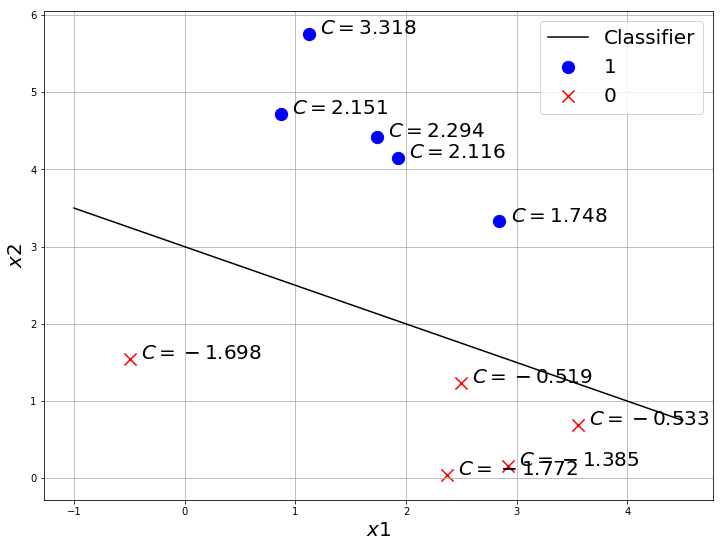

In [38]:
import matplotlib.pyplot as plt

x = np.arange(-1, 5, 0.5)
y = 3 - 0.5 * x


plt.figure(figsize=(12,9))
plt.scatter(X_0[:, 0], X_0[:, 1], marker='o', s=150, color='blue', label='1')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=150, color='red', label='0')
plt.plot(x, y, label='Classifier', color='black')

for i in range(len(X_0)):
  plt.text(X_0[i, 0]+0.1, X_0[i, 1], '$C = {:.3f}$'.format(X_0[i, 0]/2 + X_0[i, 1]- 3), fontsize=20)

for i in range(len(X_1)):
  plt.text(X_1[i, 0]+0.1, X_1[i, 1], '$C = {:.3f}$'.format(X_1[i, 0]/2 + X_1[i, 1]- 3), fontsize=20)


plt.xlabel('$x1$', fontsize=20)
plt.ylabel('$x2$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

Now let's try with a bad classifier

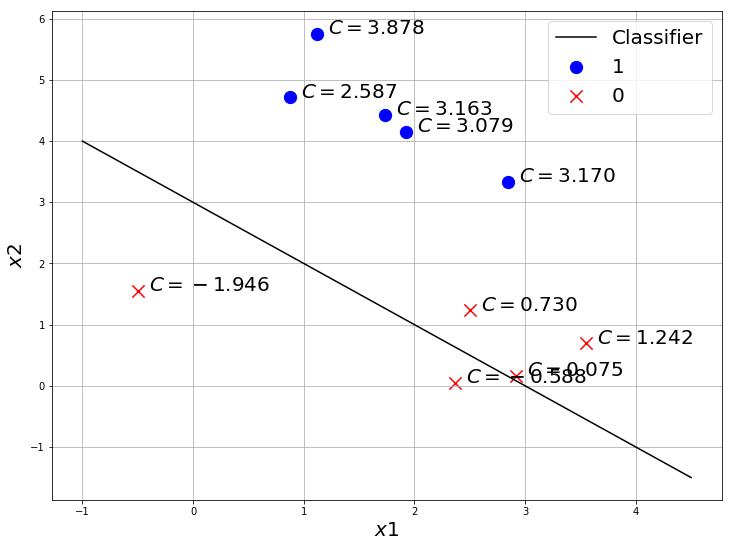

In [39]:
import matplotlib.pyplot as plt

x = np.arange(-1, 5, 0.5)
y = 3 -   x


plt.figure(figsize=(12,9))
plt.scatter(X_0[:, 0], X_0[:, 1], marker='o', s=150, color='blue', label='1')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=150, color='red', label='0')
plt.plot(x, y, label='Classifier', color='black')

for i in range(len(X_0)):
  plt.text(X_0[i, 0]+0.1, X_0[i, 1], '$C = {:.3f}$'.format(X_0[i, 0] + X_0[i, 1]- 3), fontsize=20)

for i in range(len(X_1)):
  plt.text(X_1[i, 0]+0.1, X_1[i, 1], '$C = {:.3f}$'.format(X_1[i, 0] + X_1[i, 1]- 3), fontsize=20)


plt.xlabel('$x1$', fontsize=20)
plt.ylabel('$x2$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

You can see, the same class points have same sign when the classifier is good. So this metric C is actually a good way to find how good a classifier is.

We would like to know the probability of a point to be class 1. $P(y=1|X)$

We can do this by converting $C(x,y)$ into a range $[0,1]$ using a function called Sigmoid/Logistic.

## Sigmoid/Logistic Function

## $g(x) = \dfrac{1}{1+e^{-x}}$ 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png' height="300" width="400">

Sigmoid can convert a number in Real range to $[0, 1]$ which is what we need to convert the score $C(x,y)$ to probability $P(y=1|X)$.

Let's code sigmoid in Numpy.

In [0]:
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

In [43]:
a = np.array([-200,980, 0.1, -23, 1e-3])

sigmoid(a)

array([1.38389653e-87, 1.00000000e+00, 5.24979187e-01, 1.02618796e-10,
       5.00250000e-01])

Sigmoid converted all the number from range 980 to -200 into a range of [0,1].

## Probabilities with Sigmoid

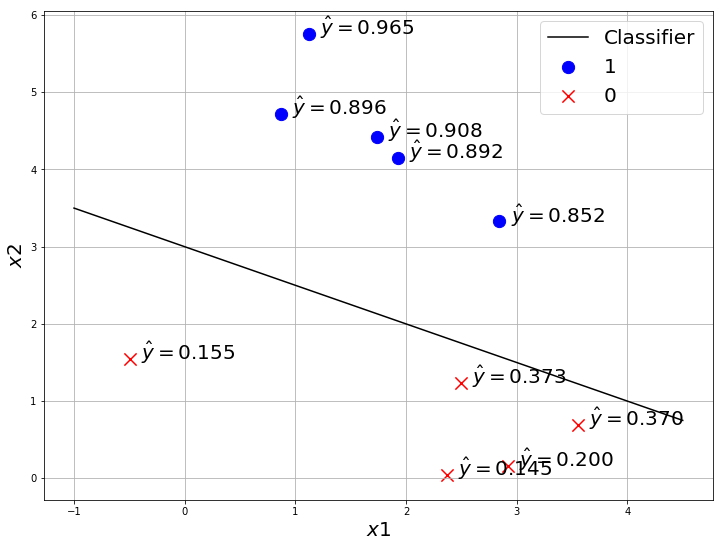

In [47]:
import matplotlib.pyplot as plt

x = np.arange(-1, 5, 0.5)
y = 3 - 0.5 * x


plt.figure(figsize=(12,9))
plt.scatter(X_0[:, 0], X_0[:, 1], marker='o', s=150, color='blue', label='1')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=150, color='red', label='0')
plt.plot(x, y, label='Classifier', color='black')

for i in range(len(X_0)):
  plt.text(X_0[i, 0]+0.1, X_0[i, 1], '$\hat{{y}} = {:.3f}$'.format(sigmoid(X_0[i, 0]/2 + X_0[i, 1]- 3)), fontsize=20)

for i in range(len(X_1)):
  plt.text(X_1[i, 0]+0.1, X_1[i, 1], '$\hat{{y}} = {:.3f}$'.format(sigmoid(X_1[i, 0]/2 + X_1[i, 1]- 3)), fontsize=20)


plt.xlabel('$x1$', fontsize=20)
plt.ylabel('$x2$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

So sigmoid gives the probability of the point to be class '1' ie: $P(y=1|X)$.

**Note: this can also be $\hat{y} = P(y=0|X)$, it depends on how you define 1 and 0 class. you can define it either way, but usually we use $\hat{y} = P(y=1|X)$.**

When $\hat{y} > 0.5$ we classify it as class "1" and when $\hat{y} <= 0.5$ we classify it as class "0".

## How to compare the models?

We still didn't learn about how to find the best model. But let's say we have 2 models, how do we compare which one is the best?

**By comparing the $\hat{y}$(prediction of the model) and $y$(true label) of each data.**

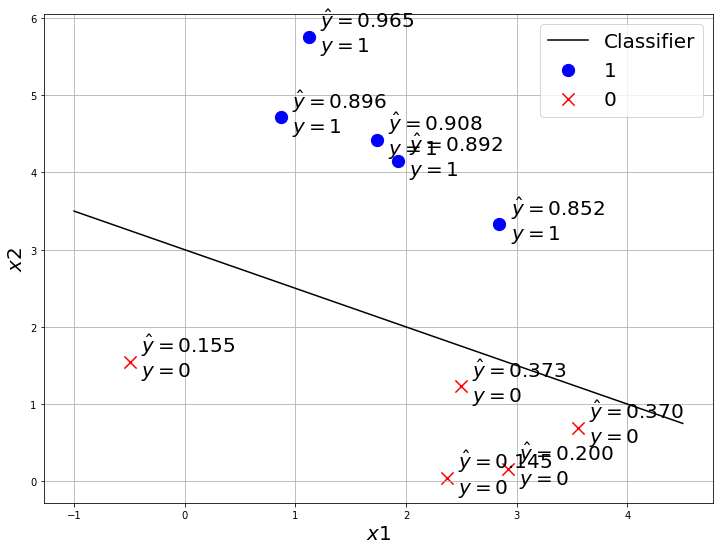

In [51]:
import matplotlib.pyplot as plt

x = np.arange(-1, 5, 0.5)
y = 3 - 0.5 * x


plt.figure(figsize=(12,9))
plt.scatter(X_0[:, 0], X_0[:, 1], marker='o', s=150, color='blue', label='1')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=150, color='red', label='0')
plt.plot(x, y, label='Classifier', color='black')

for i in range(len(X_0)):
  plt.text(X_0[i, 0]+0.1, X_0[i, 1]-0.2, '$\hat{{y}} = {:.3f}$\n$y=1$'.format(sigmoid(X_0[i, 0]/2 + X_0[i, 1]- 3)), fontsize=20)

for i in range(len(X_1)):
  plt.text(X_1[i, 0]+0.1, X_1[i, 1]-0.2, '$\hat{{y}} = {:.3f}$\n$y=0$'.format(sigmoid(X_1[i, 0]/2 + X_1[i, 1]- 3)), fontsize=20)


plt.xlabel('$x1$', fontsize=20)
plt.ylabel('$x2$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

## Maximum Likelihood

$\hat{y} = g(W.X+b)$ gives the probability of $X$ belonging to class $\{1\}$. We want every point to have maximum predicted probability of that point to have its true label.ie:
- if true label $y=1$, then we want to maximize $\hat{y}_1 = \hat{y} = g(W.X+b)$.
- if true label $y=0$, then we want to maximize $\hat{y}_0 = 1 - \hat{y} = 1 - g(W.X+b)$.

As a point can have only 2 option either $\{0, 1\}$. so $\hat{y}_0 + \hat{y}_1 = 1$.

### Likelihood
Product of predicted probabilities of every point to have its true label. 

$L = \prod_{i=1}^{m}{P(\hat{y}^i|X^i)}$

where $\hat{y}^i$ means $i^{th}$ data prediction and $X^i$ means $i^{th}$ data.

So the objective of any classification model in Machine Learning is to maximize this Likelihood $L$ thus its called Maximum Likelihood.

Let's take an example to calculate the Maximum Likelihood.

In [3]:
import numpy as np

y_hat = np.array([0.94, 0.0271, 0.43, 0.56, 0.012])

MaxL = 1
for i in range(len(y_hat)):
    MaxL *= y_hat[i]

MaxL

7.360967039999999e-05

The maximum Likelihood of just 5 numbers goes to an order of $10^{-5}$, in real dataset we will have thousands, sometimes millions of data which will give a MaximumLikelihood beyond the range of computation.

So we use the property of logarithm $log(a.b) = log(a) + log(b)$ to make this multiplication to addition, so it remains in the range of computation.

$Log(MaxL) = log(\prod_{i=1}^{m}{P(\hat{y}^i|X^i))}$

$LogLikelihood = \sum_{i=1}^{m}{log(P(\hat{y}^i|X^i))}$

Let's try this Log likelihood with Numpy

In [4]:
import numpy as np

y_hat = np.array([0.94, 0.0271, 0.43, 0.56, 0.012])

LogL = 1
for i in range(len(y_hat)):
    LogL += np.log(y_hat[i])

LogL

-8.516734149556177

This number is can be used in computation easily and you can observe for any dataset Log likelihood will be in a good range of computation and it will be a negative number as log of any number less than one is negative.

So we introduce a negative sign to make it positive. Why? We would like to make this problem to find minimum loss, optimization is relatively easier for convex functions than concave.

$NegLogLikelihood = -\sum_{i=1}^{m}{log(P(\hat{y}^i|X^i))}$

This is called as **Negative Log Likelihood Loss **or also as **Cross Entropy Loss**.

Now there are 2 cases
- $y = 0$, then we want $P(\hat{y}^i|X^i) =  \hat{y}_0 = 1 - \hat{y} = 1 - g(W.X+b)$
- $y = 1$, then $P(\hat{y}^i|X^i) =  \hat{y}_1 = \hat{y} =  g(W.X+b)$

So we generalize this 2 cases with

 $ NLL(y, \hat{y}) = -\dfrac{1}{m} \sum_{i=1}^{m}{y^i log(\hat{y}^i) + (1-y^i) log(1 - \hat{y}^i)}$

 We divide the loss with m, to get the average, so the number of example may not affect the loss.

 Let's code this loss with Numpy.

In [0]:
def CrossEntropy(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

In [7]:
y = np.array([0, 1, 1, 0, 0, 1, 1, 1 ])
y_hat_1 = np.array([0.11, 0.76, 0.56, 0.21, 0.04, 0.7, 0.64, 0.95])
y_hat_2 = np.array([0.71, 0.36, 0.16, 0.61, 0.34, 0.5, 0.14, 0.8])

CrossEntropy(y_hat_1, y),CrossEntropy(y_hat_2, y)

(0.26269860327583516, 1.041454329918626)

See how a bad prediction gives more CrossEntropy loss than a better prediction.

## Finding the best Model : Gradient Descent

We are going to use the same optimization algorithm which we used for Linear Regression. In almost every deep learning problem, we will use gradient descent or a variation or better version of Gradient Descent. Adam and SGD are better versions of Gradient descent which also uses something called momentum. We will learn more about it later.

- randomly initialize W, b
- in loop for n steps/epochs{
    - find $\hat{y} = g(X.W + b)$
    - find $ \mathcal{L}(y, \hat{y}) = NLL(y, \hat{y})$
    - find $ \frac{\partial \mathcal{L}}{\partial w} $ and $ \frac{\partial \mathcal{L}}{\partial b} $
    - Update W and b with $w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$ and $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$
}

Every thing remains same as Linear Regression except now the Loss function $\mathcal{L}(y, \hat{y})$ is different, so  $ \frac{\partial \mathcal{L}}{\partial w} $ and $ \frac{\partial \mathcal{L}}{\partial b} $ may be different. But it can easily be alculated with chain rule.

If you didn't understand how we calculated  $ \frac{\partial \mathcal{L}}{\partial w} $ and $ \frac{\partial \mathcal{L}}{\partial b} $ in Linear Regression , I strongly recommend you to learn multi variable calculus. Its very easy and interesting.


One good thing about frameworks like Tensorflow, PyTorch is that they have soemthing called Automatic Gradient. So you don't need to perform these gradient calculation by hand and code it, you give the loss function and parameters, the framework will calculate the gradients of Loss wrt every parameter and update the parameter. 

So after chain rule, 

$\dfrac{\partial \mathcal{L}}{\partial w_i}  = \dfrac{1}{m} \sum_{j=1}^{m}{x_i^j(\hat{y}^j - y^j)}$


$\dfrac{\partial \mathcal{L}}{\partial b}  = \dfrac{1}{m} \sum_{j=1}^{m}{((\hat{y}^j - y^j)}$

We will update the parameters with 
$w_i := w_i - \alpha \dfrac{1}{m} \sum_{j=1}^{m}{x_i^j(\hat{y}^j - y^j)}$

$b := b - \alpha \dfrac{1}{m} \sum_{j=1}^{m}{((\hat{y}^j - y^j)}$

where $\alpha$ is called learning rate, if learning rate is very high the model will learn faster, but may not converge well. if the learning rate is less, the model may take more time but will converge well ie: will get to less loss.


Now Let's code Logistic Regression model in Numpy and train it. Then use Tensorflow's Keras API to train Logistic Regression Model.

In [0]:
import numpy as np

def gradient_descent(w, b, X, y, a):
  w = w - a / X.shape[0] * np.dot(X.T, Log_Reg_model(X, w, b)- y)
  b = b - a / X.shape[0] * np.sum(Log_Reg_model(X, w, b)- y)
  return w, b

So far we have seen the math which is used in Logistic Regression model. But when you code, you will have to take care of the dimensions as well. we have seen $\hat{y} = g(X.W+b)$ here $X.W$ need to be in correct dimension for matrix multiplication.

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
  
def Log_Reg_model(x, w, b):
  y_hat = sigmoid(np.matmul(x, w) + b)
  return y_hat

In [138]:
# here i am initializing w as (2,1) to match X(1000,2)
# you can also initialize w as (1,2) and use np.matmul(X, w.T) + b
w, b = np.random.random((2, 1)), np.random.random((1, 1))

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=9)
y = y.reshape(-1,1)
print(X.shape, y.shape, w.shape, b.shape)
print(sigmoid(np.matmul(X, w) + b).shape) # to check the dimension

(1000, 2) (1000, 1) (2, 1) (1, 1)
(1000, 1)


In [139]:
# shape of prediction and label should match
Log_Reg_model(X, w, b).shape, y.shape

((1000, 1), (1000, 1))

In [140]:
# Test the Cross entropy loss

def CrossEntropy(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

y_hat = Log_Reg_model(X, w, b)

CrossEntropy(y_hat, y)

0.5361011603546345

Lets code a function to visualize 

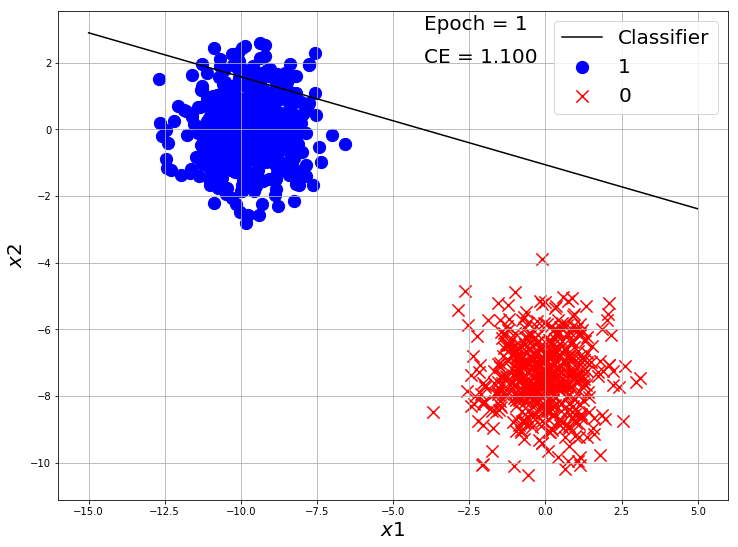

In [141]:
import matplotlib.pyplot as plt

def visualize_classification(X, y, w, b, e=None, loss=None):
    class_0 = np.where(y == 0)
    class_1 = np.where(y == 1)

    X_0 = X[class_0]
    X_1 = X[class_1]

    # change this according to the plot scale
    x0 = np.arange(-15, 5, 0.01)
    y0 = ((-b - x0 * w[1])/w[0]).reshape(-1)

    plt.figure(figsize=(12,9))
    plt.scatter(X_0[:, 0], X_0[:, 1], marker='o', s=150, color='blue', label='1')
    plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=150, color='red', label='0')
    plt.plot(x0, y0, label='Classifier', color='black')
    if e is not None:
        plt.text(-4,3,'Epoch = {}'.format(e), fontsize=20)
    if loss is not None:
        plt.text(-4,2,'CE = {:.3f}'.format(loss), fontsize=20)
    
    plt.xlabel('$x1$', fontsize=20)
    plt.ylabel('$x2$', fontsize=20)
    plt.grid(True)
    plt.legend(fontsize=20)
    plt.show()

visualize_classification(X, y.reshape(-1), w, b, e=1, loss=1.1)

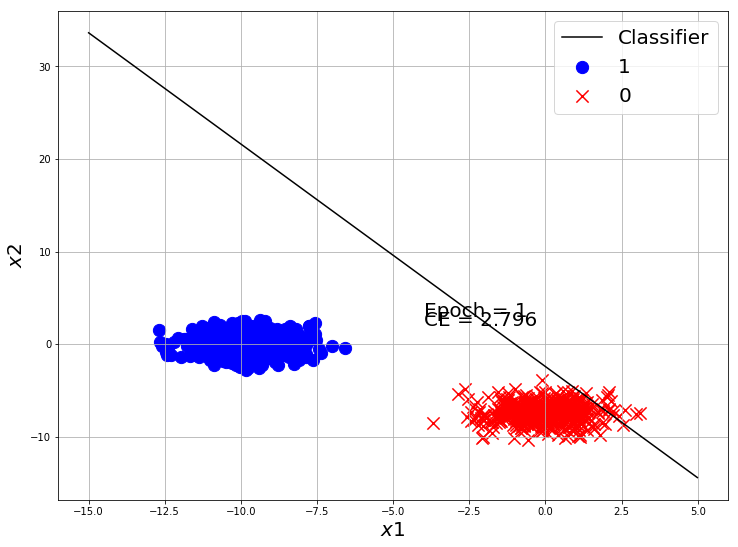

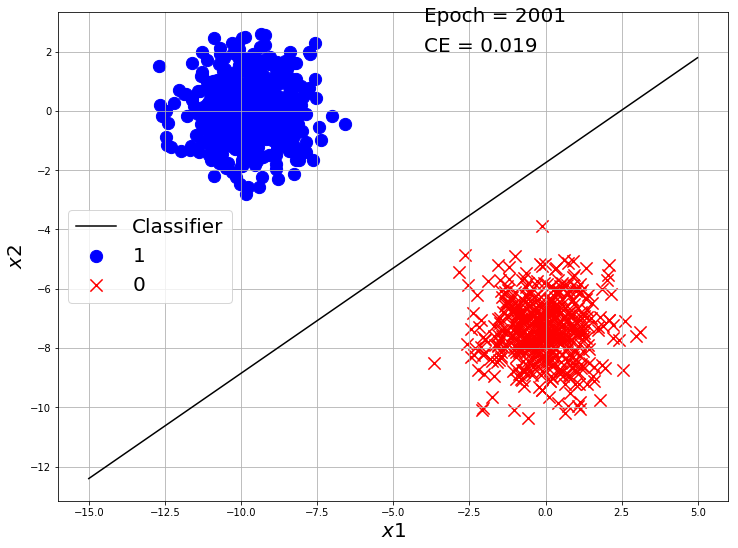

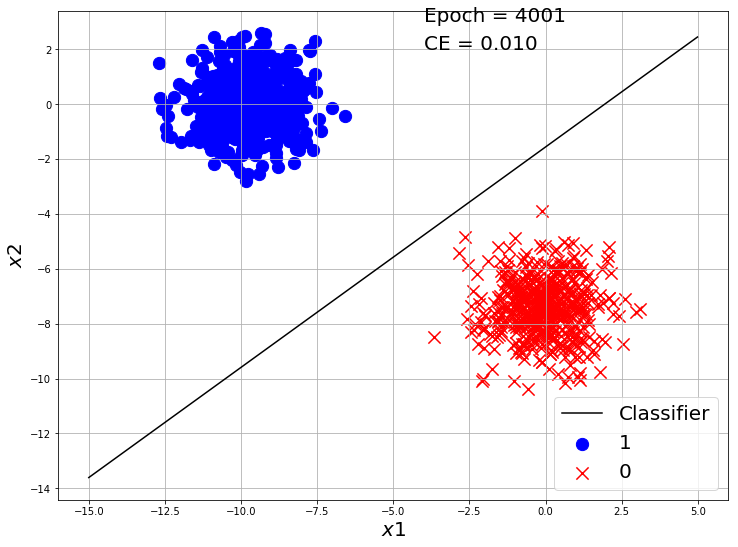

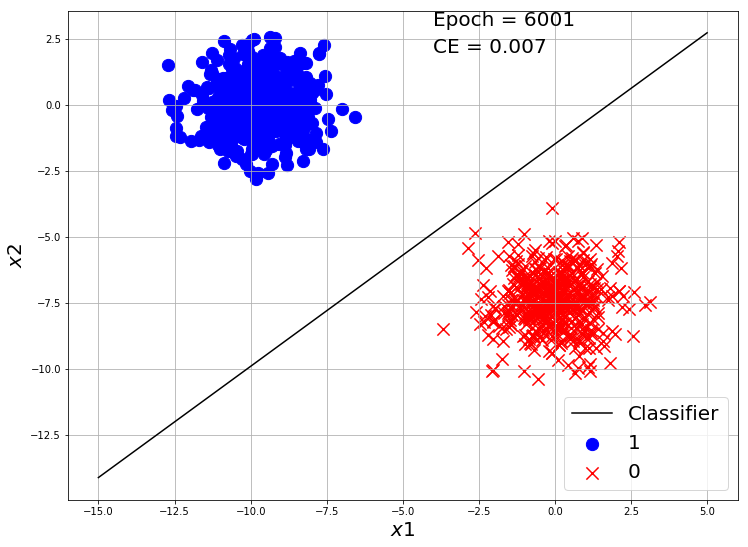

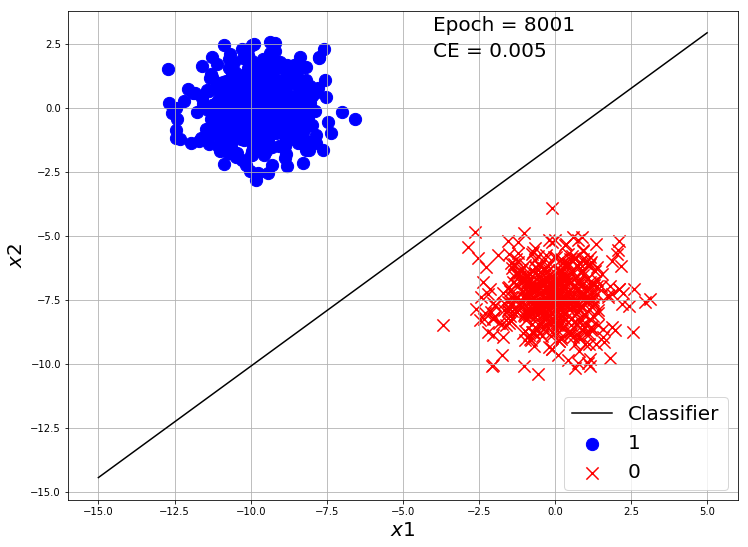

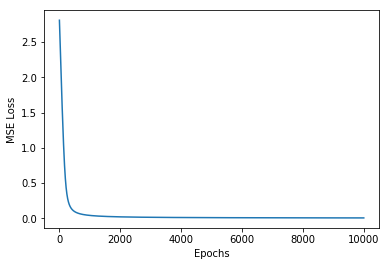

In [142]:
losses = []

alpha = 0.001
w, b = np.random.random((2, 1)), np.random.random(1)

for i in range(10000):
  y_hat = Log_Reg_model(X, w, b)
  ce = CrossEntropy(y_hat, y)
  losses.append(ce)
  w, b = gradient_descent(w, b, X, y, alpha)
  
  if i%2000 == 0:
    y_hat = Log_Reg_model(X, w, b)
    ce = CrossEntropy(y_hat, y)
    
    visualize_classification(X, y.reshape(-1), w, b, e=i+1, loss=ce)

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

Our classifier made a good classification on this toy dataset. Now Let's use Tensorflow to make a Logistic Regression model and train on this dataset.

# Logistic Regression in TensorFlow

In [155]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

def CrossEntropy(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=9)


model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[2]), keras.layers.Activation('sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X, y, epochs=10, verbose=True)

Epoch 1/10
10000/10000 [==============================] - 0s 42us/sample - loss: 1.8787 - acc: 0.5026
Epoch 2/10
10000/10000 [==============================] - 0s 34us/sample - loss: 0.8342 - acc: 0.5618
Epoch 3/10
10000/10000 [==============================] - 0s 34us/sample - loss: 0.2851 - acc: 0.8613
Epoch 4/10
10000/10000 [==============================] - 0s 35us/sample - loss: 0.1178 - acc: 0.9942
Epoch 5/10
10000/10000 [==============================] - 0s 34us/sample - loss: 0.0660 - acc: 0.9996
Epoch 6/10
10000/10000 [==============================] - 0s 35us/sample - loss: 0.0430 - acc: 1.0000
Epoch 7/10
10000/10000 [==============================] - 0s 37us/sample - loss: 0.0303 - acc: 1.0000
Epoch 8/10
10000/10000 [==============================] - 0s 35us/sample - loss: 0.0225 - acc: 1.0000
Epoch 9/10
10000/10000 [==============================] - 0s 35us/sample - loss: 0.0172 - acc: 1.0000
Epoch 10/10
10000/10000 [==============================] - 0s 34us/sample - loss: 

We used a new metric called accuray_score.

$Accuracy = \dfrac{No\ of\ Correct\ Predictions}{Total\ no\ of\ Predictions}$

so if out of 100 data, we made 64 correct predictions and 36 incorrect then the accuracy score is $\dfrac{64}{100} = 0.64$.


This dataset was very easy, so it got accuracy score of 1.0 easily.

Let's Try another dataset.

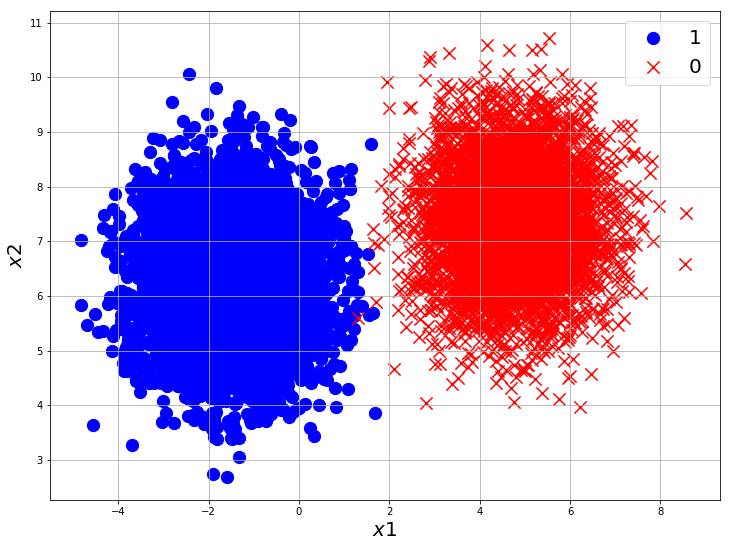

Epoch 1/50
10000/10000 [==============================] - 0s 44us/sample - loss: 5.3699 - acc: 0.5000
Epoch 2/50
10000/10000 [==============================] - 0s 37us/sample - loss: 3.3782 - acc: 0.5000
Epoch 3/50
10000/10000 [==============================] - 0s 36us/sample - loss: 1.4879 - acc: 0.5018
Epoch 4/50
10000/10000 [==============================] - 0s 37us/sample - loss: 0.4169 - acc: 0.7775
Epoch 5/50
10000/10000 [==============================] - 0s 37us/sample - loss: 0.2076 - acc: 0.9886
Epoch 6/50
10000/10000 [==============================] - 0s 37us/sample - loss: 0.1627 - acc: 0.9962
Epoch 7/50
10000/10000 [==============================] - 0s 37us/sample - loss: 0.1385 - acc: 0.9958
Epoch 8/50
10000/10000 [==============================] - 0s 37us/sample - loss: 0.1197 - acc: 0.9962
Epoch 9/50
10000/10000 [==============================] - 0s 37us/sample - loss: 0.1038 - acc: 0.9964
Epoch 10/50
10000/10000 [==============================] - 0s 37us/sample - loss: 

In [164]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

def CrossEntropy(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=27)

class_0 = np.where(y == 0)
class_1 = np.where(y == 1)

X_0 = X[class_0]
X_1 = X[class_1]

plt.figure(figsize=(12,9))
plt.scatter(X_0[:, 0], X_0[:, 1], marker='o', s=150, color='blue', label='1')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='x', s=150, color='red', label='0')
plt.xlabel('$x1$', fontsize=20)
plt.ylabel('$x2$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()


model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[2]), keras.layers.Activation('sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X, y, epochs=50, verbose=True)

You can see from the plot, that is not possible to get a accuracy of 1.0 with a linear classifier like Logistic Regression for this dataset as few of the class points are overlapping. But it still gives a very good result with just few lines of code. 